In [2]:
import nilmtk


Bad key "text.kerning_factor" on line 4 in
/clusteruy/home/cmarino/miniconda3/envs/mine/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
BORDER = 1

ACTIVATION_PARAM = {'fridge':   {'on_power_threshold': 50,
                                'min_on_duration': 60,
                                'min_off_duration': 12,
                                'border': BORDER,
                                },
                    'kettle':   {'on_power_threshold': 2000,
                                'min_on_duration': 12,
                                'min_off_duration': 0,
                                'border': BORDER,
                                },
                    'microwave': {'on_power_threshold': 200,
                                'min_on_duration': 12,
                                'min_off_duration': 30,
                                'border': BORDER,
                                },
                    'washing machine': {'on_power_threshold': 20,
                                'min_on_duration': 1800,
                                'min_off_duration': 160,
                                'border': BORDER,
                                },
                    'dish washer': {'on_power_threshold': 10,
                                'min_on_duration': 1800,
                                'min_off_duration': 1800,
                                'border': BORDER,
                                },
                    }
name_elecs = list(ACTIVATION_PARAM.keys())

In [5]:
name_elecs

['fridge', 'kettle', 'microwave', 'washing machine', 'dish washer']

In [6]:
path_uk = 'ukdale.h5'
uk = nilmtk.DataSet(path_uk)

In [7]:
#uk.buildings[1].elec

In [8]:
HOUSE = 1
elecs = {k:uk.buildings[HOUSE].elec[k] for k in name_elecs}

In [9]:
activations = {k:uk.buildings[HOUSE].elec[k].activation_series(**ACTIVATION_PARAM[k])
               for k in name_elecs}

In [10]:
print({k:len(activations[k]) for k in name_elecs})

{'fridge': 39661, 'kettle': 7600, 'microwave': 7758, 'washing machine': 1379, 'dish washer': 679}


In [11]:
#import copy
def get_n_activations(activations, n=10):
    activations_first = dict()
    for k in activations.keys():
        largo = len(activations[k])
        indexs = np.random.choice(largo, size=n, replace=False)
        activations_first[k] = [activations[k][i] for i in indexs]
    return activations_first
        

In [12]:
activations = get_n_activations(activations, 10)
print({k:len(activations[k]) for k in name_elecs})

{'fridge': 10, 'kettle': 10, 'microwave': 10, 'washing machine': 10, 'dish washer': 10}


In [44]:
def reset_index(activations):
    for k, v in activations.items():
        for serie in v:
            serie.index = serie.index - serie.index[0]
    return activations
activations = reset_index(activations)

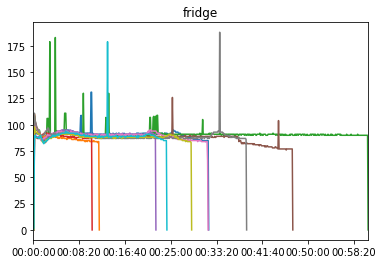

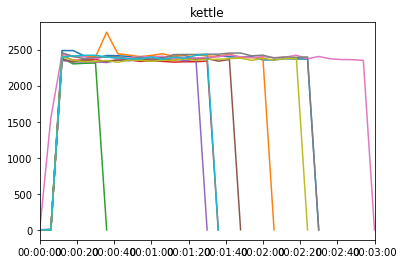

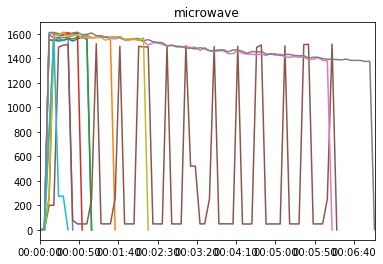

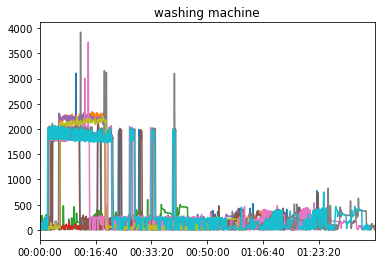

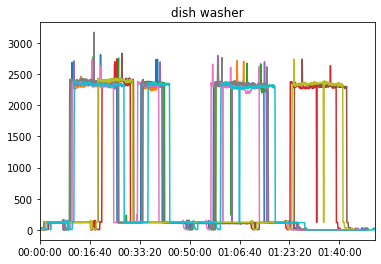

In [46]:

for k, v in activations.items():
    plt.figure()
    for serie in v:
        serie.plot()
    plt.title(k)

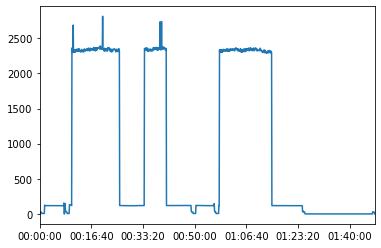

In [149]:
{k:np.mean([(serie.index[-1]-serie.index[0]) for serie in  activations[k]]) for k in name_elecs}

{'fridge': Timedelta('0 days 00:21:12.600000'),
 'kettle': Timedelta('0 days 00:02:25.200000'),
 'microwave': Timedelta('0 days 00:01:42'),
 'washing machine': Timedelta('0 days 01:20:02.400000'),
 'dish washer': Timedelta('0 days 01:42:35.400000')}

In [127]:

serie = [0 for i in range(10)]
label = [list() for i in range(10)]
for k, v in activations.items():
    p = 0.5
    for i, s in enumerate(v):
        if bool(np.random.binomial(1, p)):
            serie[i] = s.add(serie[i], fill_value=0)
            label[i].append(k)

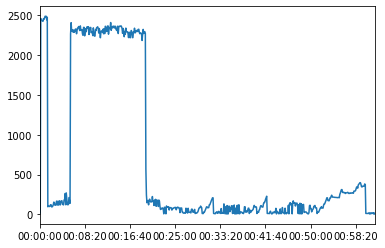

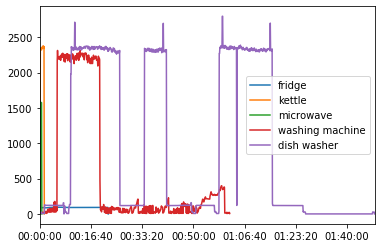

In [142]:
i = 4
plt.figure()
serie[i].plot()
label[i]

plt.figure()
for k, v in activations.items():
    v[i].plot(label=k)
plt.legend()


In [84]:
elec = 'fridge'
iterables = [[elec], [i for i in range(10)]]

columns = pd.MultiIndex.from_product(iterables, names=['elec', 'example'])
df2 = pd.DataFrame(activations[elec]).T
df2.columns = columns
df2 = df2.fillna(0)
df2

elec     fridge                                                            
example       0      1      2      3     4      5      6      7     8     9
00:00:00    0.0    0.0   17.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0
00:00:06    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   0.0   2.0
00:00:12   96.0  110.0  108.0  105.0  90.0  109.0  101.0  111.0  98.0  88.0
00:00:18   95.0  101.0   96.0  102.0  90.0   89.0   98.0  103.0  95.0  90.0
00:00:24   92.0   98.0   96.0  102.0  90.0   89.0   97.0  103.0  93.0  88.0
...         ...    ...    ...    ...   ...    ...    ...    ...   ...   ...
01:00:30    0.0    0.0   90.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0
01:00:36    0.0    0.0   90.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0
01:00:42    0.0    0.0   90.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0
01:00:48    0.0    0.0   90.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0
01:00:54    0.0    0.0    0.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0

[610 rows x 10 columns]

In [93]:
df_ = df2['fridge'].add(df['kettle'], fill_value=0)

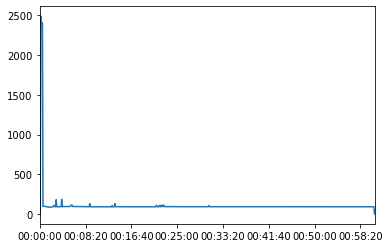

In [97]:
df_[2].plot()